# Global Power Plant Database
Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database

The database includes the following indicators:

• country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

• country_long (text): longer form of the country designation

• name (text): name or title of the power plant, generally in Romanized form

• gppd_idnr (text): 10 or 12 character identifier for the power plant

• capacity_mw (number): electrical generating capacity in megawatts

• latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

• longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

• primary_fuel (text): energy source used in primary electricity generation or export

• other_fuel1 (text): energy source used in electricity generation or export

• other_fuel2 (text): energy source used in electricity generation or export

• other_fuel3 (text): energy source used in electricity generation or export

• commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

• owner (text): majority shareholder of the power plant, generally in Romanized form

• source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

• url (text): web document corresponding to the source field

• geolocation_source (text): attribution for geolocation information

• wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

• year_of_capacity_data (number): year the capacity information was reported

• generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

• generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

• generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

• generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

• generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

• generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

• generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

• generation_data_source (text): attribution for the reported generation information

• estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013

• estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014

• estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

• estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

• estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017

• 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

• estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014

• estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015

• estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016

• estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

Fuel Type Aggregation We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction : Make two prediction 1) Primary Fuel 2) capacity_mw

Hint : Use pandas methods to combine all the datasets and then start working on this project.

Dataset Link- https://github.com/dsrscientist/dataset3/blob/main/global_Power_plant_database.csv 

In [1]:
!pip install rasterio
!pip install folium

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#analysis datatime
import datetime as dt
from datetime import datetime

import folium
import rasterio as rio
from folium import plugins
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore')

In [4]:
GPP_url_IND= 'https://raw.githubusercontent.com/dsrscientist/dataset3/main/global_Power_plant_database.csv'
gpp_IND = pd.read_csv(GPP_url_IND)

In [5]:
print(gpp_IND.shape)

(908, 25)


In [6]:
#to club all three data sets we are using concatenation

df_GPP = pd.concat([gpp_IND])
df_GPP.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [7]:
df_GPP.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
df_GPP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [9]:
df_GPP.sample(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
258,IND,India,HAVALGA SUGAR,WRI1019917,25.5,17.1202,76.4004,Biomass,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,IND,India,KUNDARGI MILL,WRI1019925,16.5,16.2651,75.5302,Biomass,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,IND,India,MARATHA CEMENT PLANT,WRI1019969,45.0,19.7030,79.2206,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534,IND,India,NEYVELI TPS EXP -II,IND0000300,500.0,11.5534,79.4408,Coal,Oil,NaN,...,WRI,NaN,2018.0,18.909000,125.380,660.780,1128.2940,1687.044,Central Electricity Authority,NaN
460,IND,India,MANGALORE REFINERY,WRI1019926,166.5,12.9821,74.8496,Gas,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,IND,India,N.A.P.S,IND0000283,440.0,28.1560,78.4089,Nuclear,NaN,NaN,...,WRI,NaN,2018.0,2403.000000,2539.000,3080.000,3036.8900,3268.570,Central Electricity Authority,NaN
823,IND,India,TUTICORIN- IND BARATH,IND0000467,300.0,8.7635,78.1753,Coal,Oil,NaN,...,WRI,NaN,2018.0,782.209087,1262.600,728.364,21.7304,0.000,Central Electricity Authority,NaN
725,IND,India,SINGRAULI STPS,IND0000415,2000.0,24.1033,82.7068,Coal,Oil,NaN,...,WRI,NaN,2018.0,14881.880000,13431.000,15054.000,13998.0000,13616.000,Central Electricity Authority,NaN
70,IND,India,BELA NAGPUR,WRI1019942,270.0,20.8050,79.0547,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,IND,India,CHAKABURA TPP,IND0000072,60.0,22.3932,82.5532,Coal,Oil,NaN,...,WRI,NaN,2018.0,3.308800,373.919,417.168,433.8480,420.909,Central Electricity Authority,NaN


In [10]:
df_GPP.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [11]:
df_GPP.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [12]:
df_GPP.duplicated().sum()

0

In [13]:
#impute the missing values
# capacity capacity_mw ,latitude ,longitude

num_cols = ['capacity_mw','latitude','longitude']
df_GPP[num_cols] = df_GPP[num_cols].fillna(df_GPP[num_cols].mean())

df_GPP.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [14]:
#impute missing values for catagorical columns with most frequent values

catagorical_cols = ['primary_fuel','other_fuel1']
if all(col in df_GPP.columns for col in catagorical_cols):
    df_GPP[catagorical_cols] = df_GPP[catagorical_cols].fillna(df_GPP[catagorical_cols].mode().iloc[0])
    print(df_GPP.isnull().sum())
else:
  miss_cols = set(catagorical_cols) - set(df_GPP.columns)
  print("Missing columns:", miss_cols)

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64


In [15]:
#impute missing values for  numerical columns with median
median_cols = ['commissioning_year','year_of_capacity_data']
df_GPP[median_cols] = df_GPP[median_cols].fillna(df_GPP[median_cols].median())
df_GPP.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                 907
other_fuel3                 908
commissioning_year            0
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [16]:
#impute missing values for categorical columns with most frequent value

most_frequent_cols = ['owner','geolocation_source']
df_GPP[most_frequent_cols] = df_GPP[most_frequent_cols].fillna(df_GPP[most_frequent_cols].mode().iloc[0])

In [17]:
df_GPP.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                 907
other_fuel3                 908
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [18]:
df_GPP.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,NaN,...,National Renewable Energy Laboratory,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [20]:
#Check for consistency
#need to check  if the  'generation_gwh' value are consistent across years, example there shouldn't be a drastic increase or descrease with out a reasonable cause.
#validation of 'generation_gwh' values  and commissioning_year

for year in range(2013,2017):
  year_col = f'generation_gwh_{year}'
  df_GPP.loc[df_GPP[year_col] < df_GPP['commissioning_year'], year_col] = np.nan

In [21]:
df_GPP.drop(columns=['wepp_id','estimated_generation_gwh'],inplace=True)

In [22]:
df_GPP.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,NaN,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,3035.55,5916.37,6243.0,5385.579736,Central Electricity Authority


In [23]:
high_miss_values = ['other_fuel2','other_fuel3']
df_GPP.drop(columns=high_miss_values,inplace=True)

In [24]:
df_GPP.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,2000.0,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,2000.0,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,3035.55,5916.37,6243.0,5385.579736,Central Electricity Authority


In [25]:
df_GPP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                908 non-null    float64
 6   longitude               908 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   other_fuel1             908 non-null    object 
 9   commissioning_year      908 non-null    float64
 10  owner                   908 non-null    object 
 11  source                  908 non-null    object 
 12  url                     908 non-null    object 
 13  geolocation_source      908 non-null    object 
 14  year_of_capacity_data   908 non-null    fl

In [26]:
df_GPP.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2013       787
generation_gwh_2014       775
generation_gwh_2015       766
generation_gwh_2016       760
generation_gwh_2017       749
generation_data_source    458
dtype: int64

In [27]:
from sklearn.impute import SimpleImputer

#impute data columns with 0 where nessaary  or using  strategy
ness_cols = [f'generation_gwh_{year}' for  year in range(2013,2017)]
imputer_gen = SimpleImputer(strategy='constant', fill_value = 0 )
df_GPP[ness_cols] = imputer_gen.fit_transform(df_GPP[ness_cols])

In [28]:
df_GPP.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017       749
generation_data_source    458
dtype: int64

In [29]:
df_GPP['generation_gwh_2017'].fillna(0, inplace=True)
df_GPP['generation_data_source'].fillna('N/A', inplace=True)

In [30]:
df_GPP.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

In [31]:
df_GPP.to_csv('df_GPP_cleaned_data.csv',index=False)

In [32]:
df_GPP.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,0.0,0.00,0.00,0.0,0.000000,N/A
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,2000.0,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,0.0,0.00,0.00,0.0,0.000000,N/A
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,2000.0,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,0.0,0.00,0.00,0.0,0.000000,N/A
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,0.0,0.00,0.00,0.0,0.000000,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,0.0,3035.55,5916.37,6243.0,5385.579736,Central Electricity Authority


In [33]:
df_GPP.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,1998.183921,2018.0,812.242531,912.252271,979.022205,1025.704821,1087.705531
std,580.221767,6.088110,4.781201,13.085938,0.0,2737.480884,2949.529236,3130.216914,3158.093995,3215.799002
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1997.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,21.278850,76.978950,2000.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,388.125000,25.183775,79.211600,2003.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


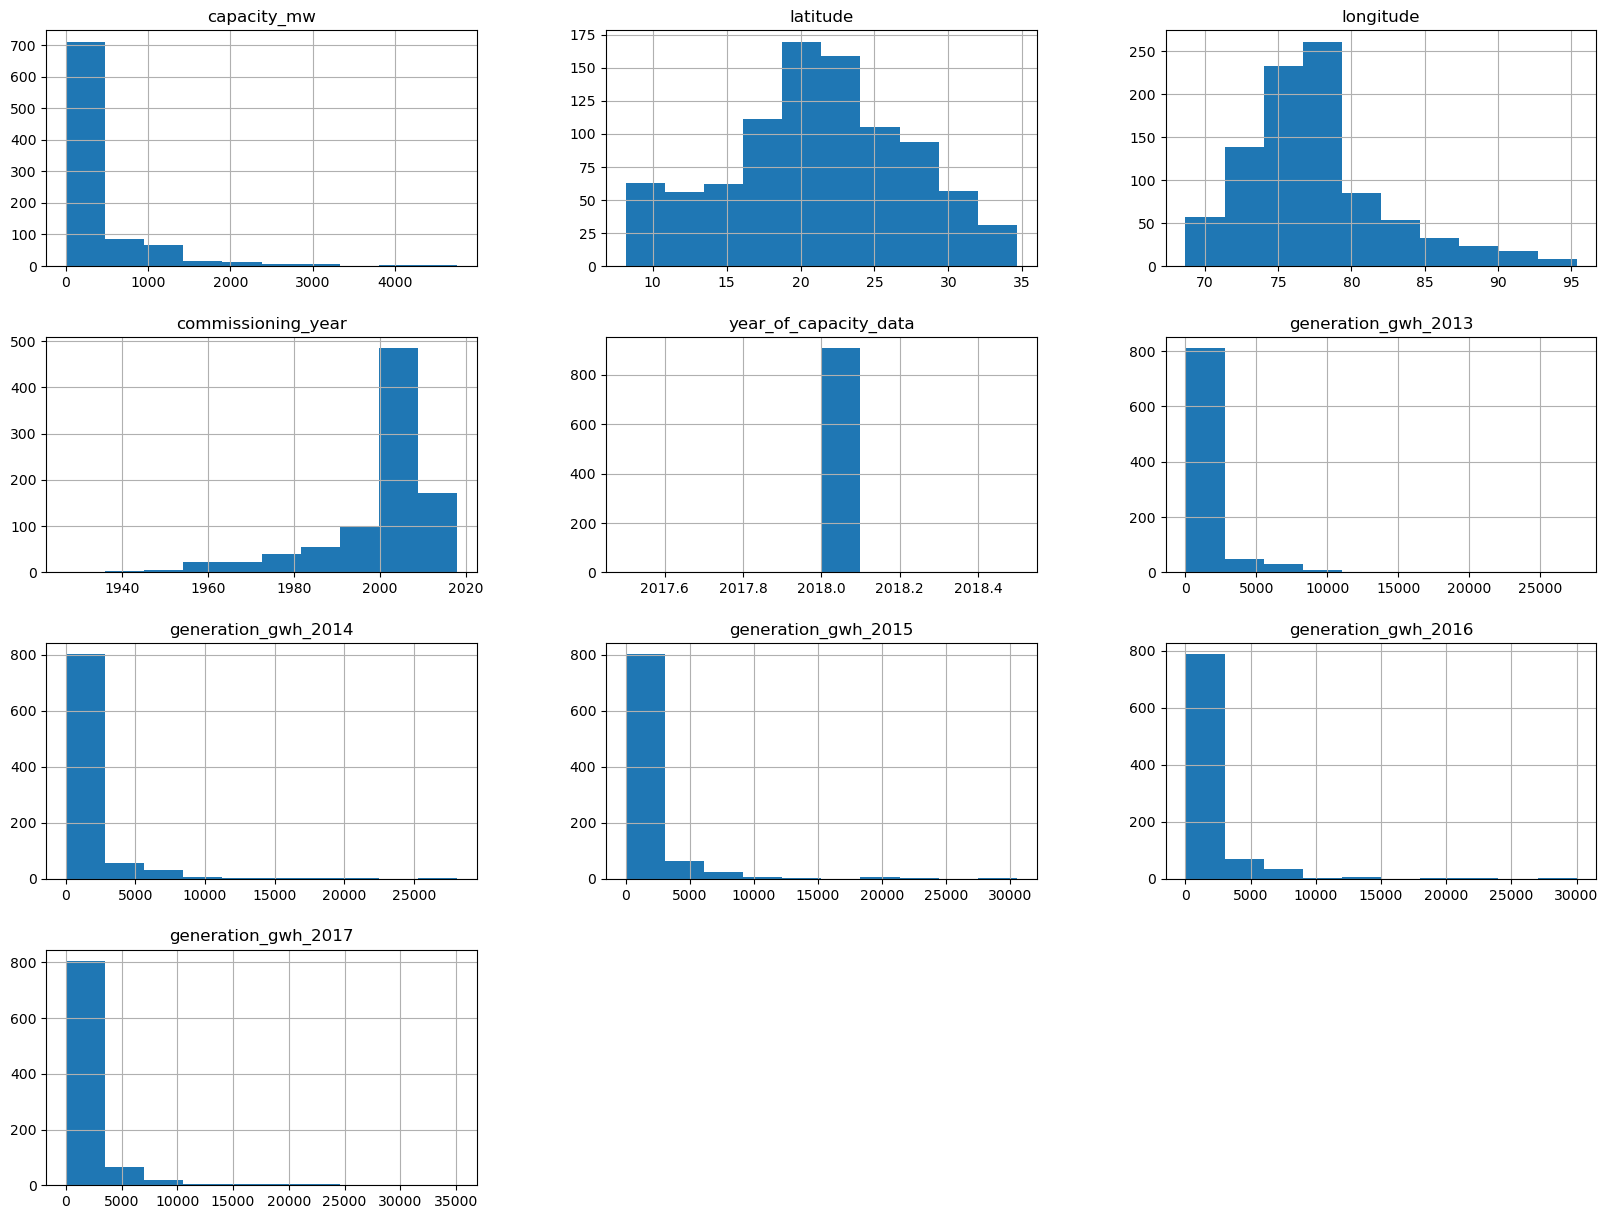

In [34]:
df_GPP.hist(figsize=(20,15))
plt.show()

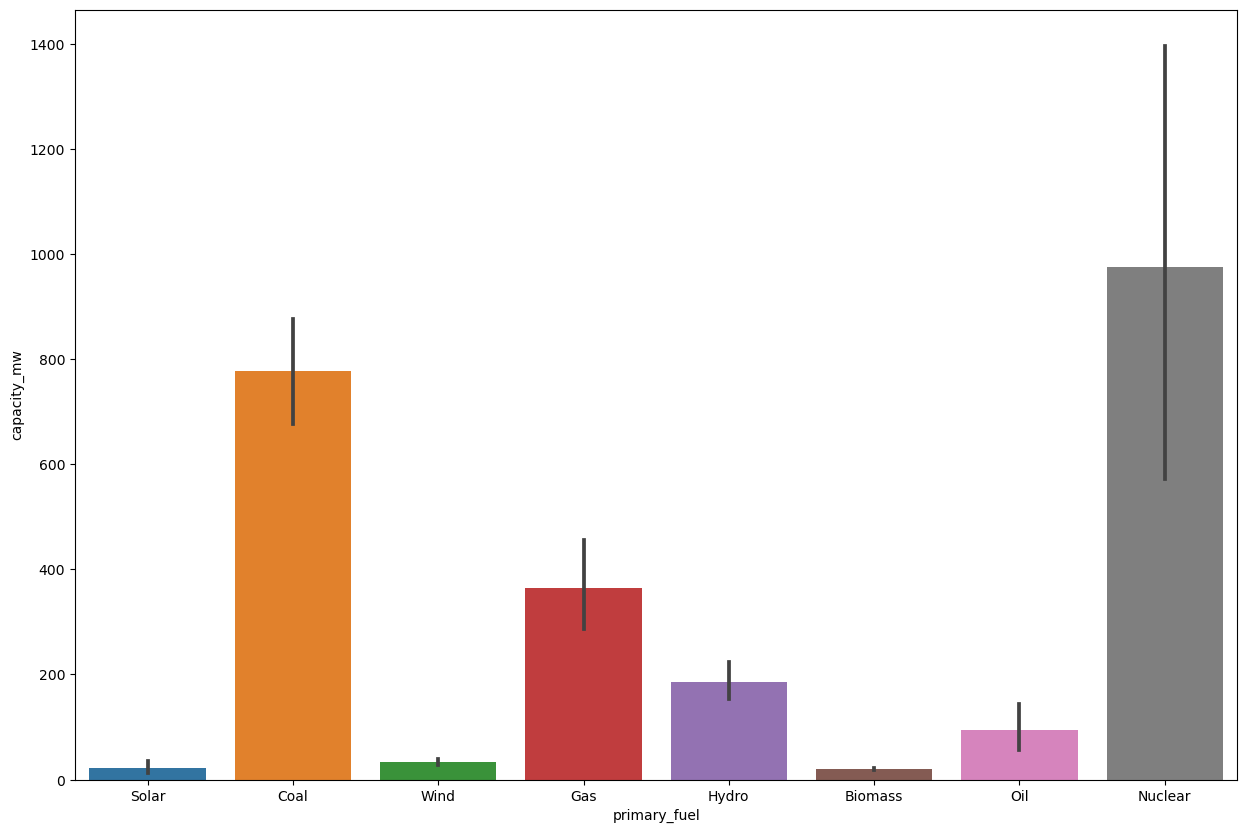

In [35]:
#Fuel details

plt.figure(figsize=(15,10))
sns.barplot(x='primary_fuel',y='capacity_mw',data=df_GPP)
plt.show()

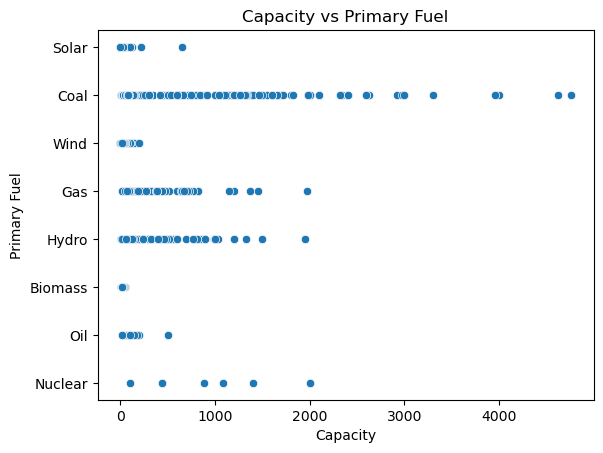

In [36]:
#scatter plot
sns.scatterplot(x=df_GPP.capacity_mw, y = df_GPP.primary_fuel)
plt.title('Capacity vs Primary Fuel')
plt.xlabel('Capacity')
plt.ylabel('Primary Fuel')
plt.show()

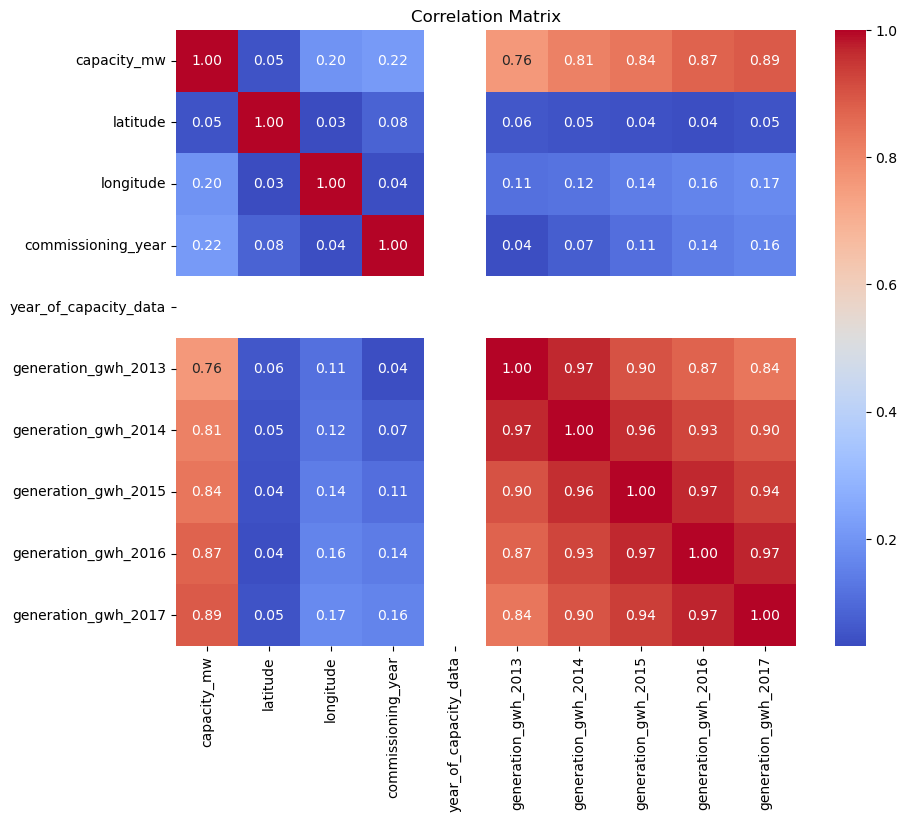

In [37]:
#Correlation Matrix

numerical_df_GPP = df_GPP.select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical_df_GPP.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

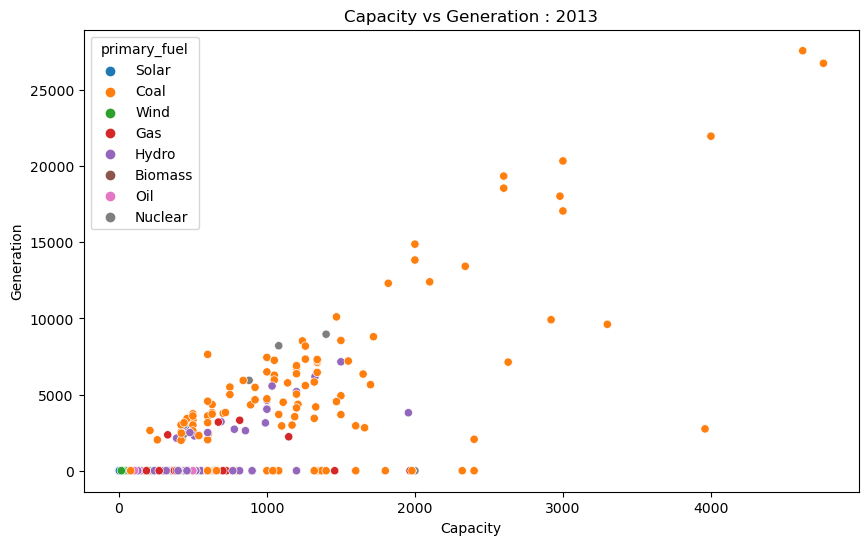

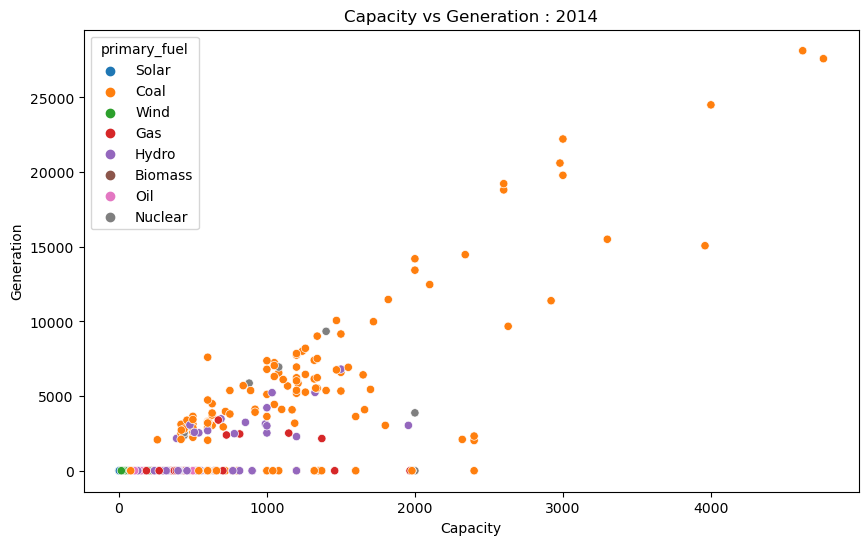

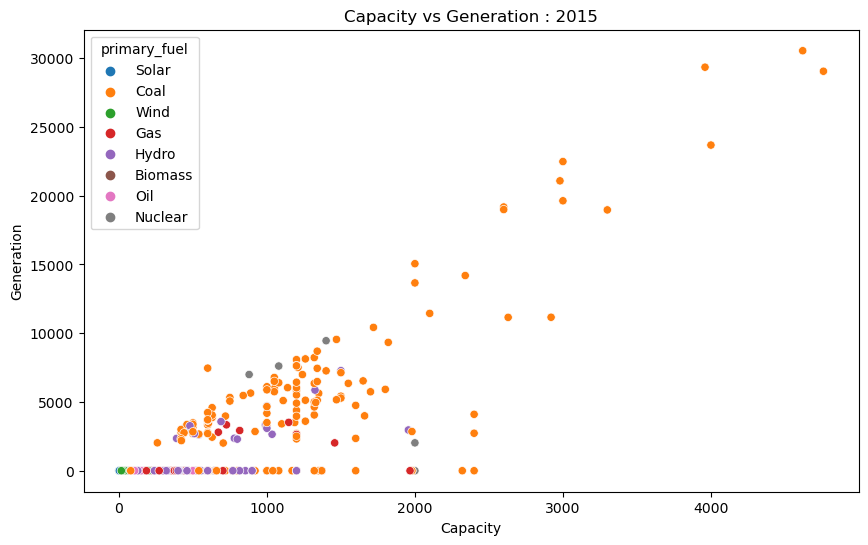

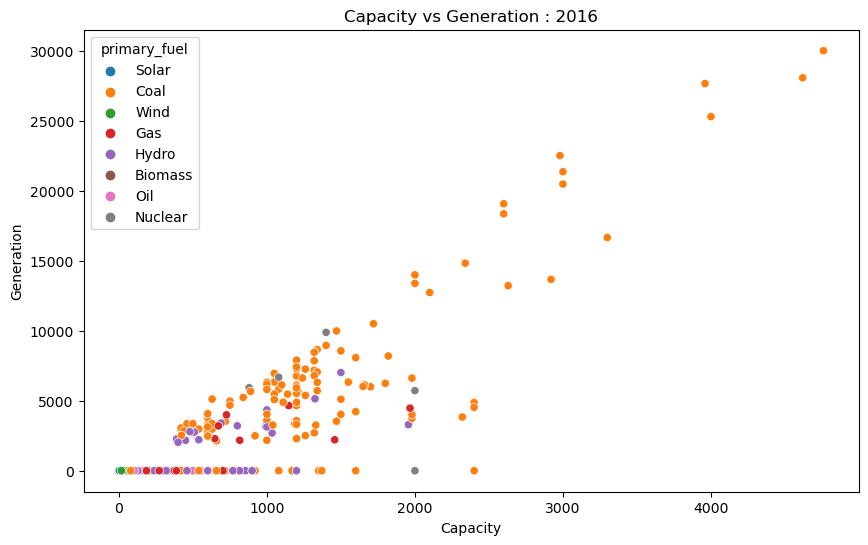

In [38]:
# Capacity vs genaration analysis
years = range(2013,2017)

for year in years:
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x='capacity_mw', y=f'generation_gwh_{year}', data=df_GPP,hue = 'primary_fuel')
  plt.title(f'Capacity vs Generation : {year}')
  plt.xlabel('Capacity')
  plt.ylabel('Generation')
  plt.show()

In [39]:
df_GPP.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,0.0,0.00,0.00,0.0,0.000000,N/A
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,2000.0,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,0.0,0.00,0.00,0.0,0.000000,N/A
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,2000.0,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,0.0,0.00,0.00,0.0,0.000000,N/A
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,0.0,0.00,0.00,0.0,0.000000,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,0.0,3035.55,5916.37,6243.0,5385.579736,Central Electricity Authority


In [40]:
df_GPP.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_data_source'],
      dtype='object')

In [41]:
from sklearn.preprocessing import LabelEncoder #,OneHotEncoder
le = LabelEncoder()
#one_hot_en = OneHotEncoder()

label_encoder_coulmns = ['country','country_long','name','gppd_idnr','primary_fuel','other_fuel1','geolocation_source','generation_data_source','owner','source','url']
#one_hot_encode_columns = ['geolocation_source','generation_data_source']


In [42]:
label_encode = {}

for col in label_encoder_coulmns:
  df_GPP[col] = le.fit_transform(df_GPP[col])
  label_encode[col] = le

In [43]:
#apply One Hot encoding

#df_GPP = pd.get_dummies(df_GPP, columns=one_hot_encode_columns)
df_GPP.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,0,0,658,2.5,28.1839,73.2407,6,2,2011.0,...,109,128,1,2018.0,0.0,0.00,0.00,0.0,0.000000,1
1,0,0,1,520,98.0,24.7663,74.6090,1,2,2000.0,...,174,173,2,2018.0,0.0,0.00,0.00,0.0,0.000000,1
2,0,0,2,854,39.2,21.9038,69.3732,7,2,2000.0,...,21,205,2,2018.0,0.0,0.00,0.00,0.0,0.000000,1
3,0,0,3,0,135.0,23.8712,91.3602,2,2,2004.0,...,22,58,2,2018.0,0.0,0.00,0.00,0.0,0.000000,0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,2015.0,...,22,58,2,2018.0,0.0,3035.55,5916.37,6243.0,5385.579736,0


In [44]:
df_GPP['generation_gwh_2017'] = pd.to_numeric(df_GPP['generation_gwh_2017'], errors='coerce')

In [45]:
df_GPP.dtypes

country                     int32
country_long                int32
name                        int32
gppd_idnr                   int32
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
other_fuel1                 int32
commissioning_year        float64
owner                       int32
source                      int32
url                         int32
geolocation_source          int32
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source      int32
dtype: object

In [46]:
#Feature and target selection
features = df_GPP.drop(['primary_fuel','capacity_mw'],axis=1)
target_fuel = df_GPP['primary_fuel']
target_capacity = df_GPP['capacity_mw']

In [47]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split

X_train_fuel,X_test_fuel,y_train_fuel,y_test_fuel = train_test_split(features,target_fuel,test_size=0.2,random_state=42)
X_train_capacity,X_test_capacity,y_train_capacity,y_test_capacity = train_test_split(features,target_capacity,test_size=0.2,random_state=42)

In [48]:
#Standardize the feature
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score


scaler = StandardScaler()
X_train_fuel = scaler.fit_transform(X_train_fuel)
X_test_fuel = scaler.transform(X_test_fuel)
X_train_capacity = scaler.fit_transform(X_train_capacity)
X_test_capacity = scaler.transform(X_test_capacity)

In [49]:
#Classifiers for fuel predections

#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [50]:
classifiers = {
          'svc':SVC(),
          'rfc':RandomForestClassifier(),
          'knc':KNeighborsClassifier(),
          'gau':GaussianNB(),
          'dtc' : DecisionTreeClassifier(),
          'abc' : AdaBoostClassifier(),
          'grd':GradientBoostingClassifier(),
          'bagg':BaggingClassifier()
}

In [51]:
#train AND evalate classifiers for primary fuel predection
imputer = SimpleImputer(strategy='mean')

X_train_fuel = imputer.fit_transform(X_train_fuel)
X_test_fuel = imputer.transform(X_test_fuel)

for name, classifier in classifiers.items():
  classifier.fit(X_train_fuel,y_train_fuel)
  y_pred_fuel = classifier.predict(X_test_fuel)
  accuracy = accuracy_score(y_test_fuel,y_pred_fuel)
  print(f'{name} : {accuracy}')

svc : 0.7692307692307693
rfc : 0.8736263736263736
knc : 0.8021978021978022
gau : 0.46153846153846156
dtc : 0.8076923076923077
abc : 0.6263736263736264
grd : 0.8571428571428571
bagg : 0.8406593406593407


In [52]:
import joblib
rfc = RandomForestClassifier()
rfc.fit(X_train_fuel,y_train_fuel)
y_pred_fuel = rfc.predict(X_test_fuel)
accuracy = accuracy_score(y_test_fuel,y_pred_fuel)
print(f'Random forest classifier : {accuracy}')

Random forest classifier : 0.8626373626373627


In [53]:
joblib.dump(rfc,'best_rfc_model.pkl') # best classification model is randomforest classifier

['best_rfc_model.pkl']

In [54]:
#train AND evalate  for capacity_mw  predection
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [55]:
models = [LinearRegression(),
          Ridge(alpha = 0.001),
          Lasso(alpha=0.003),
          SVR(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          AdaBoostRegressor(base_estimator=LinearRegression())]

model_names = 'LinearRegression','Ridge','Lasso','SVR','SGDRegressor','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','AdaBoostRegressor','KNeighborsRegressor','BaggingRegressor'
model_df = pd.DataFrame(columns=['Model','MSE','R2','MeanCV'])
for model,model_names in zip(models,model_names):
  print(model)

  model.fit(X_train_capacity,y_train_capacity)
  pred = model.predict(X_test_capacity)
  mse = mean_squared_error(y_test_capacity,pred,squared=False)
  r2 = model.score(X_test_capacity,y_test_capacity)

  averages = cross_val_score(model,X_train_capacity,y_train_capacity,cv=5,scoring='neg_mean_squared_error').mean()

  model_df = pd.concat([model_df,pd.DataFrame({'Model': [model_names],'MSE':mse,'R2':r2,'MeanCV': [averages]})],ignore_index=True)
print(model_df)

LinearRegression()
Ridge(alpha=0.001)
Lasso(alpha=0.003)
SVR()
DecisionTreeRegressor()
RandomForestRegressor()
GradientBoostingRegressor()
AdaBoostRegressor(base_estimator=LinearRegression())
                       Model         MSE        R2         MeanCV
0           LinearRegression  207.820518  0.860364  -61058.942521
1                      Ridge  207.820018  0.860364  -61058.632778
2                      Lasso  207.832550  0.860347  -61057.336417
3                        SVR  587.730948 -0.116810 -391971.454622
4               SGDRegressor  260.200120  0.781104  -97041.019714
5      DecisionTreeRegressor  179.516982  0.895808  -58049.435401
6      RandomForestRegressor  190.155371  0.883093  -64517.319387
7  GradientBoostingRegressor  369.936530  0.557538  -87925.753707


In [56]:
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor()

# define the perameter grid

Paramet_grid  = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]

}
grid_search = GridSearchCV(dtr,Paramet_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train_capacity,y_train_capacity)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [58]:
#Best parameters
best_dtr = DecisionTreeRegressor(max_depth=5,min_samples_leaf=2,min_samples_split=5)
best_dtr

DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [59]:
#Trained the model

best_dtr.fit(X_train_capacity,y_train_capacity)
y_pred_capacity = best_dtr.predict(X_test_capacity)
mse_capacity = mean_squared_error(y_test_capacity,y_pred_capacity,squared=False)
r2_capacity = best_dtr.score(X_test_capacity,y_test_capacity)
print(f'Decision Tree regression MSE: {mse_capacity},  Decision Tree regression R2: {r2_capacity}')
#print(r2_capacity)

Decision Tree regression MSE: 257.17454593066554,  Decision Tree regression R2: 0.7861653973636813


In [60]:
import joblib

joblib.dump(rfc,'best_rfc_model.pkl') # best classification model is randomforest classifier
joblib.dump(best_dtr,'best_dtr_model.pkl') #best regresion model is Randomforestregressor

['best_dtr_model.pkl']